# Recall study I
Some studies on recall capacity with artificial matrices.

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '723b24a949bc9e2261eb140ef7ff1dea5bb6b906'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

In [3]:
from network import BCPNNFast, NetworkManager
from plotting_functions import plot_winning_pattern
from analysis_functions import calculate_recall_success, calculate_timings
from connectivity_functions import artificial_connectivity_matrix, create_indepedent_sequences
from plotting_functions import plot_weight_matrix, plot_network_activity_angle

## Independent sequences
Let's start first with a simple example

In [5]:
# Patterns parameters
hypercolumns = 4
minicolumns = 30

# Time
dt = 0.001

# Connectivity parameters
value = 1.0
inhibition = -1
decay_factor = 0.5
sequence_decay = 0.9
extension = 4

sequence_length = 7

sequences = create_indepedent_sequences(minicolumns, sequence_length)

w = artificial_connectivity_matrix(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                   decay_factor=decay_factor, sequence_decay=sequence_decay,
                                   extension=extension, diagonal_zero=True, self_influence=True, ampa=False)

w_ampa = artificial_connectivity_matrix(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                   decay_factor=decay_factor, sequence_decay=sequence_decay,
                                   extension=extension, diagonal_zero=True, self_influence=True, ampa=True)

In [6]:
nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
nn.w = w
nn.w_ampa = w_ampa
manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
for pattern_indexes in sequences:
    manager.stored_patterns_indexes += pattern_indexes   

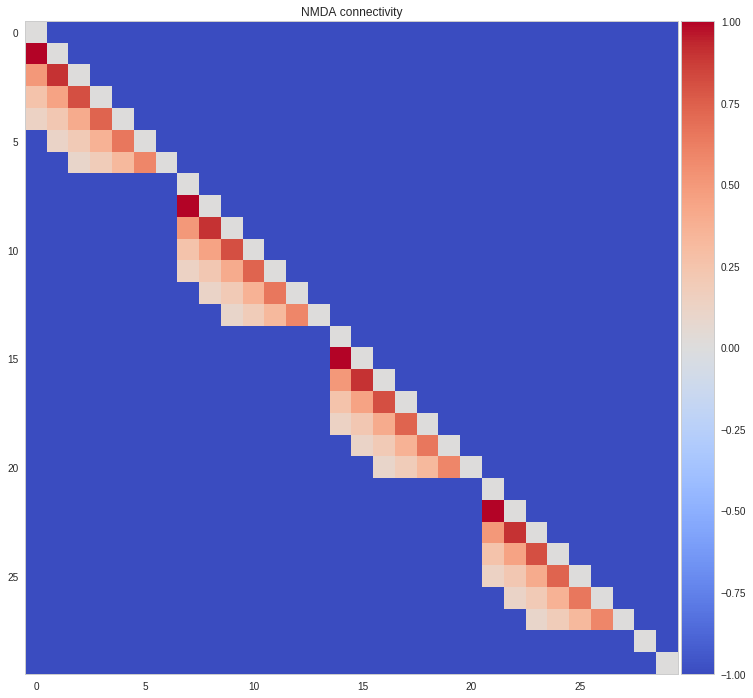

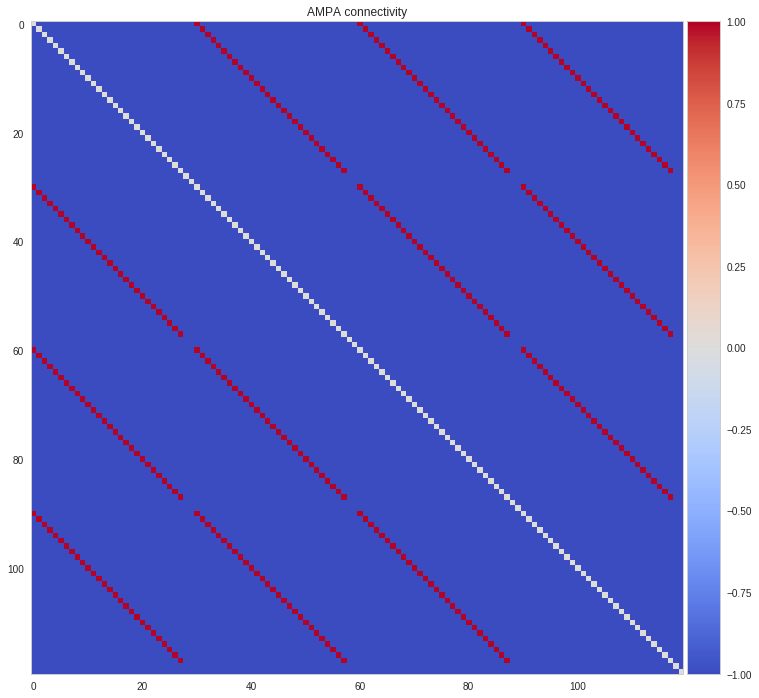

In [7]:
plot_weight_matrix(nn, ampa=False, one_hypercolum=True)
plot_weight_matrix(nn, ampa=True)

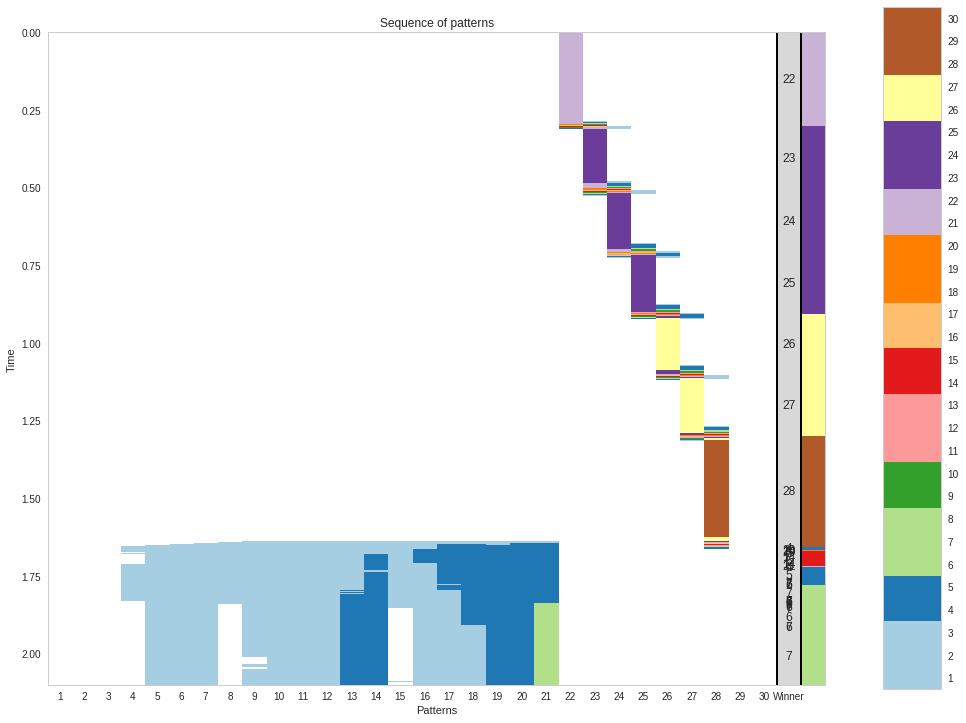

In [63]:
### Recall
T_cue = 0.100
I_cue = sequences[3][0]
T_recall = 2.0
manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)
plot_winning_pattern(manager)

In [64]:
sequences

[[0, 1, 2, 3, 4, 5, 6],
 [7, 8, 9, 10, 11, 12, 13],
 [14, 15, 16, 17, 18, 19, 20],
 [21, 22, 23, 24, 25, 26, 27]]

In [62]:
timings = calculate_timings(manager)
timings

[(14, 0.30199999999999999, 0.0, 0.30099999999999999),
 (15, 0.20400000000000001, 0.30099999999999999, 0.504),
 (16, 0.19600000000000001, 0.504, 0.69900000000000007),
 (17, 0.20000000000000001, 0.69900000000000007, 0.89800000000000002),
 (18, 0.19700000000000001, 0.89800000000000002, 1.0940000000000001),
 (19, 0.19400000000000001, 1.0940000000000001, 1.2869999999999999),
 (20, 0.35799999999999998, 1.2869999999999999, 1.6440000000000001),
 (25, 0.0040000000000000001, 1.6440000000000001, 1.647),
 (5, 0.051000000000000004, 1.647, 1.6970000000000001),
 (6, 0.002, 1.6970000000000001, 1.698),
 (5, 0.064000000000000001, 1.698, 1.7610000000000001),
 (12, 0.0030000000000000001, 1.7610000000000001, 1.7630000000000001),
 (5, 0.0060000000000000001, 1.7630000000000001, 1.768),
 (13, 0.0040000000000000001, 1.768, 1.7710000000000001),
 (12, 0.002, 1.7710000000000001, 1.772),
 (13, 0.0050000000000000001, 1.772, 1.776),
 (5, 0.0060000000000000001, 1.776, 1.7810000000000001),
 (27, 0.002, 1.7810000000000